In [ ]:
import pandas as pd

In [ ]:
campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')

In [ ]:
import altair as alt

## Task #0 - Data Exploration and Insights

In [ ]:
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [ ]:
campaign.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


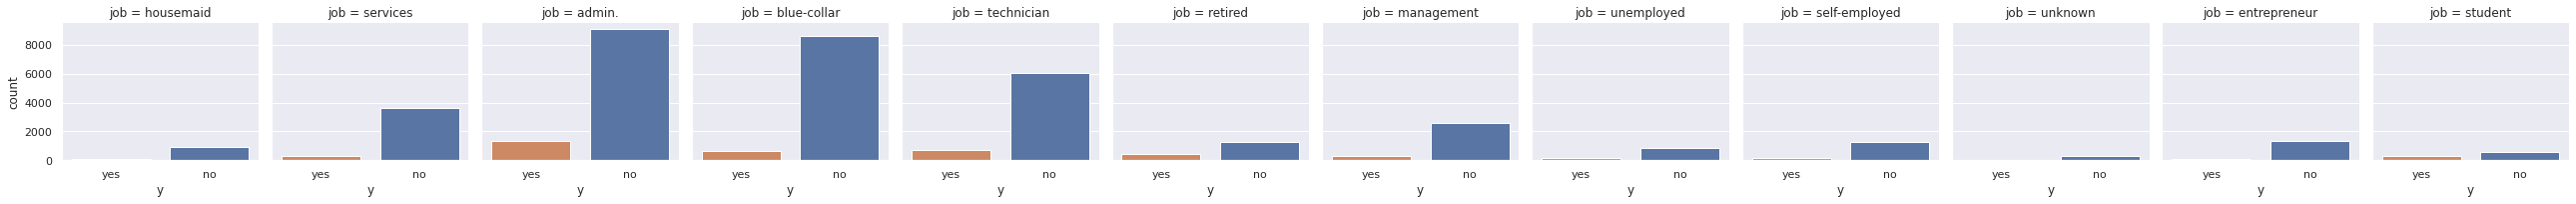

In [ ]:
# Subscription by job
sns.set(rc={'figure.figsize':(50,8.27)})
g = sns.FacetGrid(campaign, col="job", hue="y")
g.map(sns.countplot, "y", order=["yes", "no"])

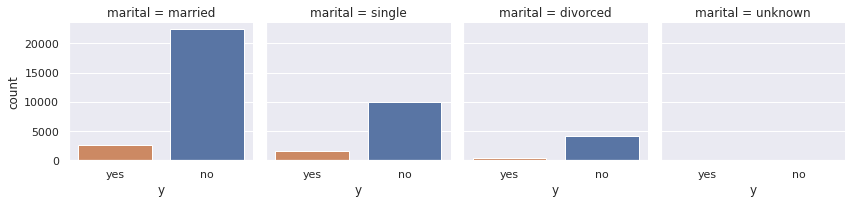

In [ ]:
# Subscription by Maritial Status
sns.set(rc={'figure.figsize':(20,8.27)})
g = sns.FacetGrid(campaign, col="marital", hue="y")
g.map(sns.countplot, "y", order=["yes", "no"])

In [ ]:
campaign["pdays"].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

In [ ]:
cut_bins = [0, 10, 20, 30, 40, 50, 60, 999]
campaign["pday_bin"] = pd.cut(campaign['pdays'], bins=cut_bins)

In [ ]:
campaign["pday_bin"].value_counts()

(60, 999]    39673
(0, 10]       1296
(10, 20]       196
(20, 30]         8
(30, 40]         0
(40, 50]         0
(50, 60]         0
Name: pday_bin, dtype: int64

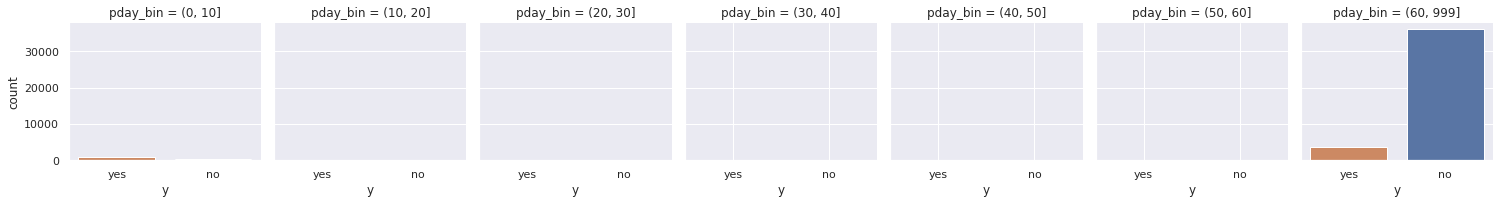

In [ ]:
sns.set(rc={'figure.figsize':(20,8.27)})
g = sns.FacetGrid(campaign, col="pday_bin", hue="y")
g.map(sns.countplot, "y", order=["yes", "no"])

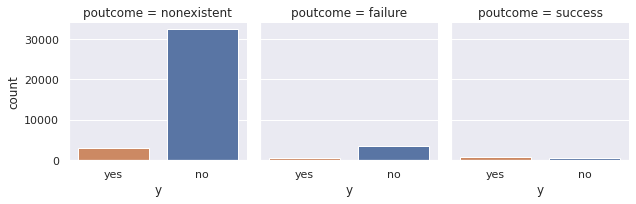

In [ ]:
sns.set(rc={'figure.figsize':(20,8.27)})
g = sns.FacetGrid(campaign, col="poutcome", hue="y")
g.map(sns.countplot, "y", order=["yes", "no"])

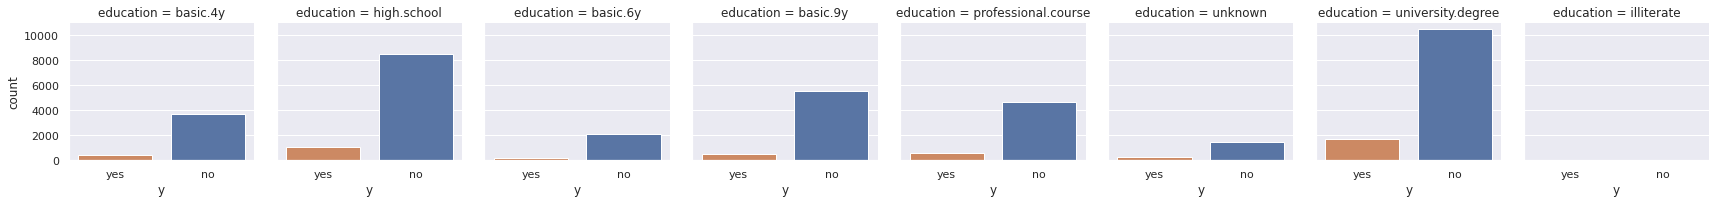

In [ ]:
sns.set(rc={'figure.figsize':(20,8.27)})
g = sns.FacetGrid(campaign, col="education", hue="y")
g.map(sns.countplot, "y", order=["yes", "no"])

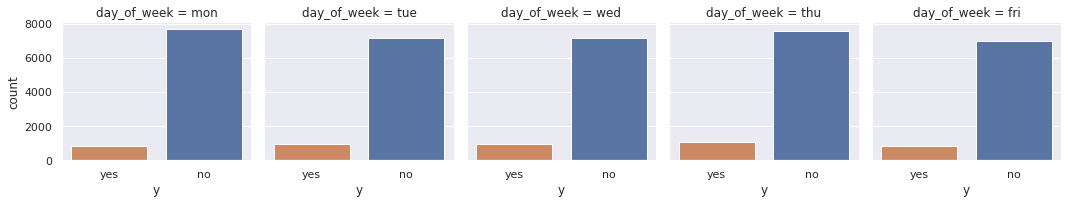

In [ ]:
sns.set(rc={'figure.figsize':(20,8.27)})
g = sns.FacetGrid(campaign, col="day_of_week", hue="y")
g.map(sns.countplot, "y", order=["yes", "no"])

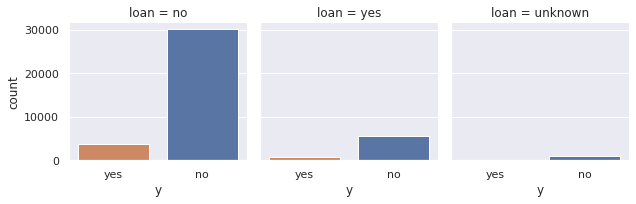

In [ ]:
sns.set(rc={'figure.figsize':(20,8.27)})
g = sns.FacetGrid(campaign, col="loan", hue="y")
g.map(sns.countplot, "y", order=["yes", "no"])

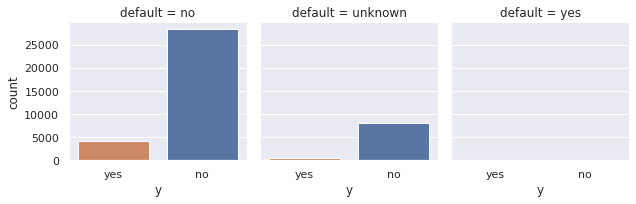

In [ ]:
sns.set(rc={'figure.figsize':(20,8.27)})
g = sns.FacetGrid(campaign, col="default", hue="y")
g.map(sns.countplot, "y", order=["yes", "no"])

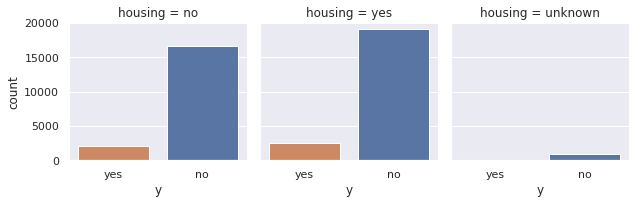

In [ ]:
sns.set(rc={'figure.figsize':(20,8.27)})
g = sns.FacetGrid(campaign, col="housing", hue="y")
g.map(sns.countplot, "y", order=["yes", "no"])

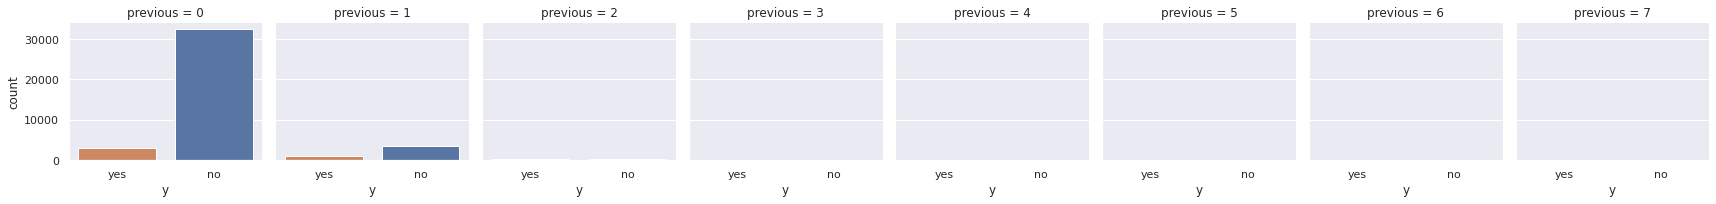

In [ ]:
sns.set(rc={'figure.figsize':(20,8.27)})
g = sns.FacetGrid(campaign, col="previous", hue="y")
g.map(sns.countplot, "y", order=["yes", "no"])

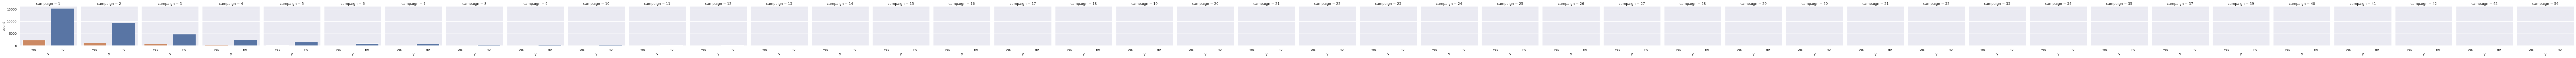

In [ ]:
sns.set(rc={'figure.figsize':(20,8.27)})
g = sns.FacetGrid(campaign, col="campaign", hue="y")
g.map(sns.countplot, "y", order=["yes", "no"])

## Task #1 - Most Likely to subscribe to a long term deposit 

In [ ]:
# Model using poutcome, job, and marital
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

campaign_drop_na = campaign.dropna()

features = ["job", "poutcome", "marital", "loan", "previous"]

X = pd.get_dummies(campaign_drop_na[features], drop_first=True)
y = campaign_drop_na["y"]

# Split our data into training and test data, with 30% reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Build the decision tree
clf = DecisionTreeClassifier()

# Train it
clf.fit(X_train, y_train)

# Test it 
clf.score(X_test, y_test)



0.8941871761658031

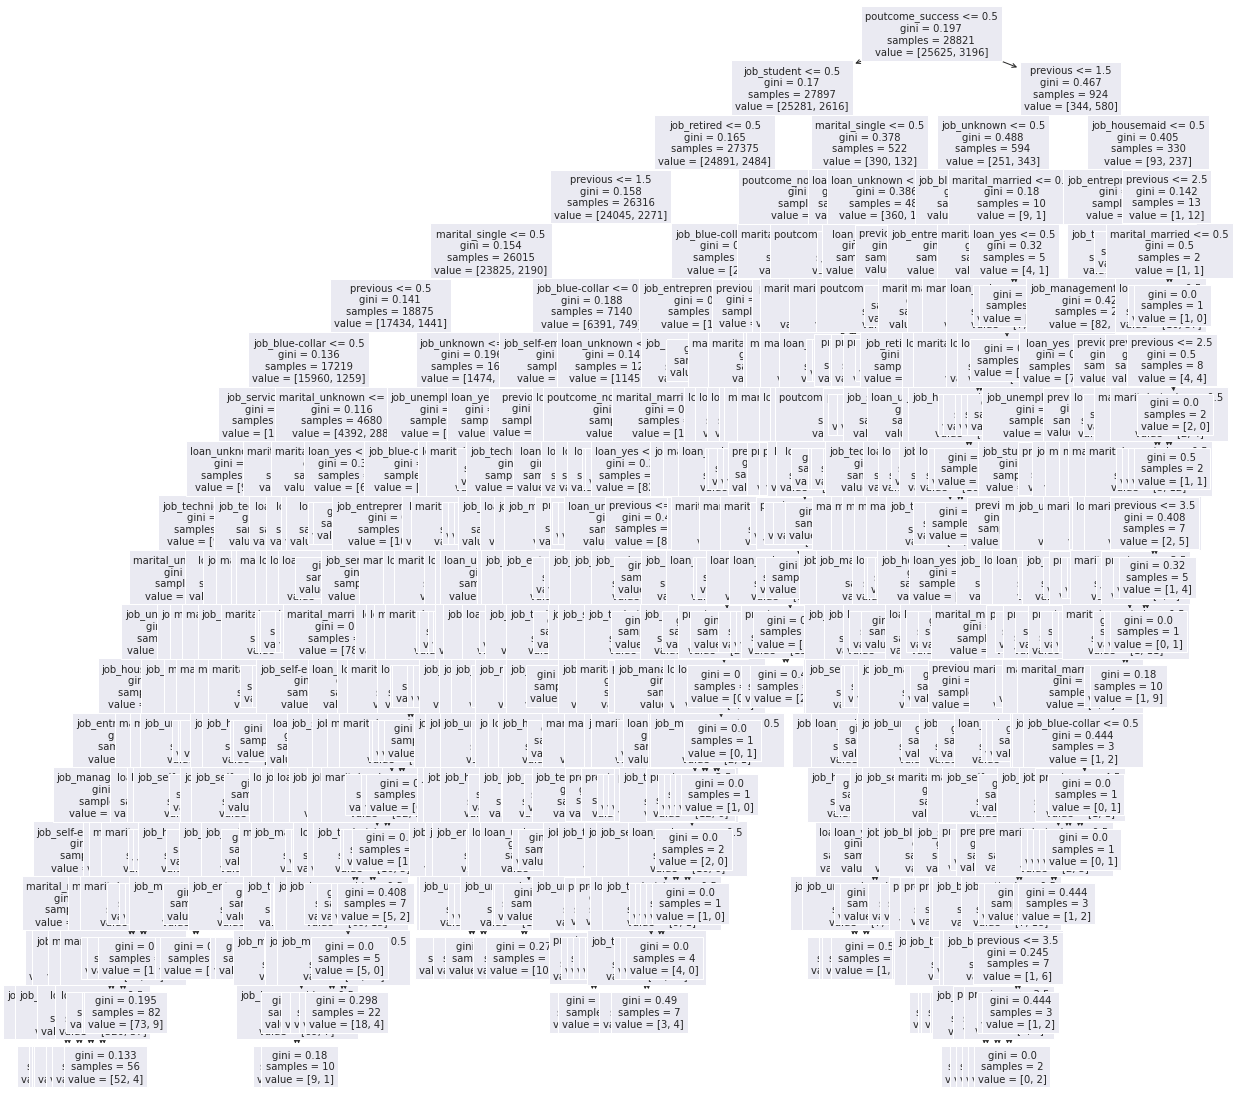

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(clf, fontsize=10, feature_names=X.columns)
plt.show()